In [1]:
import os,glob
import skvideo.io
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
file_name = glob.glob("./**.png")
file_name.sort()
img_gen = (cv2.imread(i) for i in file_name)

In [32]:
A = []
B = []
F = []

for img in img_gen:
    a = img[:, :256, ::-1]
    b = img[:, 256:512, ::-1]
    f = img[:, 512:, ::-1]
    A.append(a)
    B.append(b)
    F.append(f) 

In [33]:
A = np.asarray(A)
B = np.asarray(B)
F = np.asarray(F)

In [34]:
black = np.ones_like(A)
last_a = np.tile(A[-1], (A.shape[0], 1, 1, 1))
first_b = np.tile(B[0], (A.shape[0], 1, 1, 1))
first_f = np.tile(F[0], (A.shape[0], 1, 1, 1))

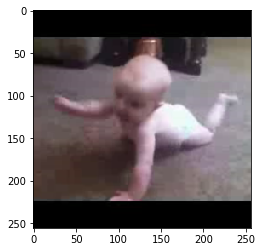

In [36]:
plt.imshow(B[0])

In [37]:
black.shape

(20, 256, 256, 3)

In [38]:
A1 = np.concatenate((A, black), axis = 1)
A2 = np.concatenate((first_b, first_f), axis = 1)
final_A = np.concatenate((A1, A2), axis=2)

BF1 = np.concatenate((last_a, black), axis = 1)
BF2 = np.concatenate((B, F), axis=1)
final_BF = np.concatenate((BF1, BF2), axis = 2)

outvid = np.concatenate((final_A, final_BF), axis = 0)

In [39]:
outvid = outvid.astype(np.uint8)

In [45]:
skvideo.io.vwrite("./outputvideo.mp4", outvid,
                  inputdict={'-r':'2'},
                  outputdict={'-r':'2'})